# Import Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn import metrics




# Library to tune different models
from sklearn.model_selection import GridSearchCV


# Libraries to get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer
)
from scipy.stats import zscore

### Mount Google Drive (For Google Colab)

In [2]:
#from google.colab import drive

#drive.mount('/content/drive')

# Load Dataset

In [3]:
td_train = pd.read_csv('Traveldata_train.csv')
td_test = pd.read_csv('Traveldata_test.csv')
sd_train = pd.read_csv('Surveydata_train.csv')
sd_test = pd.read_csv('Surveydata_test.csv')

# Check the Travel Data Train & Test

In [4]:
td_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [5]:
td_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [6]:
display(td_train.info())
display(td_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


None

In [7]:
td_train.drop('ID', axis = 1).describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,94302,2,Female,47815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,85428,2,Loyal Customer,69823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,94346.0,NaN,NaN,NaN,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Type_Travel,85153,2,Business Travel,58617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,94379,2,Eco,49342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,94379.0,NaN,NaN,NaN,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,NaN,NaN,NaN,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,NaN,NaN,NaN,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0


In [8]:
td_test.drop('ID', axis = 1).describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,35572,2,Female,18069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,32219,2,Loyal Customer,26349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,35591.0,NaN,NaN,NaN,39.446995,15.137554,7.0,27.0,40.0,51.0,85.0
Type_Travel,32154,2,Business Travel,22313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,35602,2,Eco,18473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,35602.0,NaN,NaN,NaN,1987.151761,1024.308863,50.0,1360.0,1929.0,2559.0,6868.0
Departure_Delay_in_Mins,35573.0,NaN,NaN,NaN,14.880696,37.895453,0.0,0.0,0.0,13.0,978.0
Arrival_Delay_in_Mins,35479.0,NaN,NaN,NaN,15.308802,38.531293,0.0,0.0,0.0,13.0,970.0


# Null Values

In [9]:
# Null values by %age in travel data (training)
pd.DataFrame(data={'% of Missing Values':round(td_train.isna().sum()/td_train.isna().count()*100,2)})

,% of Missing Values
ID,0.00
Gender,0.08
Customer_Type,9.48
Age,0.03
Type_Travel,9.78
Travel_Class,0.00
Travel_Distance,0.00
Departure_Delay_in_Mins,0.06
Arrival_Delay_in_Mins,0.38


In [10]:
# Null values by %age in travel data (testing)
pd.DataFrame(data={'% of Missing Values':round(td_test.isna().sum()/td_test.isna().count()*100,2)})

,% of Missing Values
ID,0.00
Gender,0.08
Customer_Type,9.50
Age,0.03
Type_Travel,9.68
Travel_Class,0.00
Travel_Distance,0.00
Departure_Delay_in_Mins,0.08
Arrival_Delay_in_Mins,0.35


## Customer Type: Null Values Treatment --> Mode

In [11]:
# Treatment of Null Values in 'Customer_Type'

td_train['Customer_Type'] = td_train['Customer_Type'].fillna(td_train['Customer_Type'].mode()[0])
td_test['Customer_Type'] = td_test['Customer_Type'].fillna(td_test['Customer_Type'].mode()[0])

## Travel Type: Null Values Treatment --> Mode

In [12]:
# Treatment of Null Values in 'Type_Travel'

td_train['Type_Travel'] = td_train['Type_Travel'].fillna(td_train['Type_Travel'].mode()[0])
td_test['Type_Travel'] = td_test['Type_Travel'].fillna(td_test['Type_Travel'].mode()[0])

## Gender: Null Values Treatment --> Mode

In [13]:
# Treatment of Null Values in 'Gender'

td_train['Gender'] = td_train['Gender'].fillna(td_train['Gender'].mode()[0])
td_test['Gender'] = td_test['Gender'].fillna(td_test['Gender'].mode()[0])

## Age: Null Values Treatment --> Mean

In [14]:
td_train.groupby(['Customer_Type', 'Type_Travel', 'Gender'])['Age'].describe()

count       mean        std  min  \
Customer_Type     Type_Travel     Gender                                       
Disloyal Customer Business Travel Female   8343.0  30.507851  11.149962  7.0   
                                  Male     7127.0  30.124456  11.002848  7.0   
                  Personal Travel Female     61.0  39.606557  19.550174  7.0   
                                  Male       67.0  41.522388  17.792881  8.0   
Loyal Customer    Business Travel Female  26308.0  42.589478  13.046406  7.0   
                                  Male    26032.0  42.607022  12.858786  7.0   
                  Personal Travel Female  13167.0  38.459330  18.459393  7.0   
                                  Male    13241.0  38.417038  18.465083  7.0   

                                           25%   50%   75%   max  
Customer_Type     Type_Travel     Gender                          
Disloyal Customer Business Travel Female  23.0  27.0  37.0  85.0  
                                  Male    23.0  27.0  37.0  85.0  
                  Personal Travel Female  22.0  39.0  59.0  70.0  
                                  Male    27.5  42.0  56.0  70.0  
Loyal Customer    Business Travel Female  34.0  43.0  52.0  85.0  
                                  Male    34.0  43.0  52.0  85.0  
                  Personal Travel Female  22.0  38.0  54.0  70.0  
                                  Male    22.0  38.0  54.0  70.0

In [15]:
td_test.groupby(['Customer_Type', 'Type_Travel', 'Gender'])['Age'].describe()

count       mean        std   min  \
Customer_Type     Type_Travel     Gender                                       
Disloyal Customer Business Travel Female  3177.0  29.999685  10.976747   7.0   
                                  Male    2657.0  30.247648  11.132469   7.0   
                  Personal Travel Female    14.0  29.571429  17.385734  10.0   
                                  Male      20.0  41.700000  19.876196   7.0   
Loyal Customer    Business Travel Female  9971.0  42.471568  12.970048   7.0   
                                  Male    9945.0  42.805128  12.938427   7.0   
                  Personal Travel Female  4933.0  38.438070  18.696971   7.0   
                                  Male    4874.0  38.620640  18.370324   7.0   

                                            25%   50%   75%   max  
Customer_Type     Type_Travel     Gender                           
Disloyal Customer Business Travel Female  23.00  27.0  37.0  85.0  
                                  Male    23.00  27.0  37.0  80.0  
                  Personal Travel Female  16.25  24.0  37.0  60.0  
                                  Male    31.50  43.0  56.5  69.0  
Loyal Customer    Business Travel Female  33.00  43.0  52.0  85.0  
                                  Male    34.00  44.0  52.0  85.0  
                  Personal Travel Female  22.00  38.0  55.0  70.0  
                                  Male    23.00  38.0  55.0  70.0

In [16]:
# Check for missing values in the Age column
missing_values_age = td_train['Age'].isna()

# Create a dictionary to store the mean age for each customer type and travel type
age_dict = {}
for customer_type in td_train['Customer_Type'].unique():
  for travel_type in td_train['Type_Travel'].unique():
    for gender in td_train['Gender'].unique():
      group = td_train[(td_train['Customer_Type'] == customer_type) & (td_train['Type_Travel'] == travel_type) & (td_train['Gender'] == gender)]
      if len(group) > 0:
        age_dict[(customer_type, travel_type, gender)] = group['Age'].mean()

# Fill the missing values in the Age column
for i in range(len(td_train)):
    if missing_values_age[i]:
        customer_type = td_train.loc[i, 'Customer_Type']
        travel_type = td_train.loc[i, 'Type_Travel']
        gender = td_train.loc[i, 'Gender']
        age = age_dict.get((customer_type, travel_type, gender))
        if age is not None:
            td_train.loc[i, 'Age'] = age

In [17]:
# Check for missing values in the Age column
missing_values_age_test = td_test['Age'].isna()

# Create a dictionary to store the mean age for each customer type and travel type
age_dict_test = {}
for customer_type_t in td_test['Customer_Type'].unique():
    for travel_type_t in td_test['Type_Travel'].unique():
        for gender_t in td_test['Gender'].unique():
            group_t = td_test[(td_test['Customer_Type'] == customer_type_t) & (td_test['Type_Travel'] == travel_type_t) & (td_test['Gender'] == gender_t)]
            if len(group_t) > 0:
                age_dict_test[(customer_type_t, travel_type_t, gender_t)] = group_t['Age'].mean()

# Fill the missing values in the Age column
for i in range(len(td_test)):
    if missing_values_age_test[i]:
        customer_type_t = td_test.loc[i, 'Customer_Type']
        travel_type_t = td_test.loc[i, 'Type_Travel']
        gender_t = td_test.loc[i, 'Gender']
        age_t = age_dict_test.get((customer_type_t, travel_type_t, gender_t))
        if age_t is not None:
            td_test.loc[i, 'Age'] = age_t

## Departure Delay: Null Values Treatment --> Mean

In [18]:
td_train.groupby(['Customer_Type', 'Type_Travel', 'Travel_Class', 'Gender'])['Departure_Delay_in_Mins'].describe()

count       mean  \
Customer_Type     Type_Travel     Travel_Class Gender                       
Disloyal Customer Business Travel Business     Female   3131.0  13.154583   
                                               Male     2928.0  13.890710   
                                  Eco          Female   5214.0  15.233794   
                                               Male     4203.0  16.460623   
                  Personal Travel Business     Female      4.0   3.250000   
                                               Male        6.0  49.333333   
                                  Eco          Female     57.0   7.929825   
                                               Male       61.0  16.377049   
Loyal Customer    Business Travel Business     Female  18594.0  14.110412   
                                               Male    18561.0  14.775282   
                                  Eco          Female   7688.0  16.026405   
                                               Male     7480.0  15.527139   
                  Personal Travel Business     Female    881.0  15.306470   
                                               Male      900.0  15.310000   
                                  Eco          Female  12276.0  14.412105   
                                               Male    12338.0  13.710245   

                                                             std  min  25%  \
Customer_Type     Type_Travel     Travel_Class Gender                        
Disloyal Customer Business Travel Business     Female  32.548608  0.0  0.0   
                                               Male    34.189923  0.0  0.0   
                                  Eco          Female  36.085927  0.0  0.0   
                                               Male    39.312997  0.0  0.0   
                  Personal Travel Business     Female   6.500000  0.0  0.0   
                                               Male    69.454062  0.0  1.5   
                                  Eco          Female  18.347693  0.0  0.0   
                                               Male    36.492540  0.0  0.0   
Loyal Customer    Business Travel Business     Female  37.316934  0.0  0.0   
                                               Male    40.091095  0.0  0.0   
                                  Eco          Female  42.731234  0.0  0.0   
                                               Male    39.049857  0.0  0.0   
                  Personal Travel Business     Female  42.699761  0.0  0.0   
                                               Male    35.358871  0.0  0.0   
                                  Eco          Female  38.581183  0.0  0.0   
                                               Male    34.654759  0.0  0.0   

                                                        50%    75%     max  
Customer_Type     Type_Travel     Travel_Class Gender                       
Disloyal Customer Business Travel Business     Female   0.0  11.00   381.0  
                                               Male     0.0  11.00   366.0  
                                  Eco          Female   0.0  14.00   569.0  
                                               Male     0.0  14.00   503.0  
                  Personal Travel Business     Female   0.0   3.25    13.0  
                                               Male    17.5  72.50   174.0  
                                  Eco          Female   0.0   5.00    89.0  
                                               Male     0.0  16.00   193.0  
Loyal Customer    Business Travel Business     Female   0.0  12.00   951.0  
                                               Male     0.0  12.00  1305.0  
                                  Eco          Female   0.0  14.00  1592.0  
                                               Male     0.0  13.00   750.0  
                  Personal Travel Business     Female   0.0  12.00   692.0  
                                               Male     0.0  13.00   328.0  
                                 

In [19]:
td_test.groupby(['Customer_Type', 'Type_Travel', 'Travel_Class', 'Gender'])['Departure_Delay_in_Mins'].describe()

count       mean  \
Customer_Type     Type_Travel     Travel_Class Gender                      
Disloyal Customer Business Travel Business     Female  1184.0  12.864020   
                                               Male    1093.0  15.690759   
                                  Eco          Female  1992.0  14.953313   
                                               Male    1563.0  18.095969   
                  Personal Travel Business     Female     2.0   4.000000   
                                  Eco          Female    12.0  23.750000   
                                               Male      20.0   7.750000   
Loyal Customer    Business Travel Business     Female  7151.0  14.288072   
                                               Male    7049.0  14.070081   
                                  Eco          Female  2812.0  16.003912   
                                               Male    2896.0  16.062845   
                  Personal Travel Business     Female   312.0  13.948718   
                                               Male     327.0  13.847095   
                                  Eco          Female  4615.0  14.858938   
                                               Male    4545.0  14.988339   

                                                             std  min  25%  \
Customer_Type     Type_Travel     Travel_Class Gender                        
Disloyal Customer Business Travel Business     Female  35.207285  0.0  0.0   
                                               Male    48.185515  0.0  0.0   
                                  Eco          Female  36.751713  0.0  0.0   
                                               Male    45.459833  0.0  0.0   
                  Personal Travel Business     Female   5.656854  0.0  2.0   
                                  Eco          Female  52.359118  0.0  0.0   
                                               Male    12.928447  0.0  0.0   
Loyal Customer    Business Travel Business     Female  36.138697  0.0  0.0   
                                               Male    35.537157  0.0  0.0   
                                  Eco          Female  36.375786  0.0  0.0   
                                               Male    40.709767  0.0  0.0   
                  Personal Travel Business     Female  34.909492  0.0  0.0   
                                               Male    34.643954  0.0  0.0   
                                  Eco          Female  36.699488  0.0  0.0   
                                               Male    40.221570  0.0  0.0   

                                                       50%    75%    max  
Customer_Type     Type_Travel     Travel_Class Gender                     
Disloyal Customer Business Travel Business     Female  0.0  10.00  402.0  
                                               Male    0.0  12.00  921.0  
                                  Eco          Female  0.0  13.00  412.0  
                                               Male    0.0  16.00  566.0  
                  Personal Travel Business     Female  4.0   6.00    8.0  
                                  Eco          Female  3.5  18.25  185.0  
                                               Male    0.0  13.75   41.0  
Loyal Customer    Business Travel Business     Female  0.0  12.00  756.0  
                                               Male    0.0  12.00  729.0  
                                  Eco          Female  0.0  15.00  420.0  
                                               Male    0.0  13.00  559.0  
                  Personal Travel Business     Female  0.0  11.00  323.0  
                                               Male    0.0  12.00  368.0  
                                  Eco          Female  0.0  12.00  590.0  
                                               Male    0.0  12.00  978.0

In [20]:
# Check for missing values in the Depart Delay column
missing_values_depart = td_train['Departure_Delay_in_Mins'].isna()

# Create a dictionary to store the mean Depart Delay for each customer type and travel type
depart_dict = {}
for customer_type in td_train['Customer_Type'].unique():
  for travel_type in td_train['Type_Travel'].unique():
    for travel_class in td_train['Travel_Class'].unique():
      for gender in td_train['Gender'].unique():
        group_d = td_train[(td_train['Customer_Type'] == customer_type) & (td_train['Type_Travel'] == travel_type) & (td_train['Travel_Class'] == travel_class) & (td_train['Gender'] == gender)]
        if len(group_d) > 0:
          depart_dict[(customer_type, travel_type, travel_class, gender)] = group_d['Departure_Delay_in_Mins'].mean()

# Fill the missing values in the Depart Delay column
for i in range(len(td_train)):
    if missing_values_depart[i]:
        customer_type = td_train.loc[i, 'Customer_Type']
        travel_type = td_train.loc[i, 'Type_Travel']
        travel_class = td_train.loc[i, 'Travel_Class']
        gender = td_train.loc[i, 'Gender']
        depart = depart_dict.get((customer_type, travel_type, travel_class, gender))
        if depart is not None:
            td_train.loc[i, 'Departure_Delay_in_Mins'] = depart

In [21]:
# Check for missing values in the Depart Delay column
missing_values_depart_t = td_test['Departure_Delay_in_Mins'].isna()

# Create a dictionary to store the mean Depart Delay for each customer type and travel type
depart_dict_t = {}
for customer_type_dt in td_test['Customer_Type'].unique():
  for travel_type_dt in td_test['Type_Travel'].unique():
    for travel_class_dt in td_test['Travel_Class'].unique():
      for gender_dt in td_test['Gender'].unique():
        group_dt = td_test[(td_test['Customer_Type'] == customer_type_dt) & (td_test['Type_Travel'] == travel_type_dt) & (td_test['Travel_Class'] == travel_class_dt) & (td_test['Gender'] == gender_dt)]
        if len(group_dt) > 0:
          depart_dict_t[(customer_type_dt, travel_type_dt, travel_class_dt, gender_dt)] = group_dt['Departure_Delay_in_Mins'].mean()

# Fill the missing values in the Depart Delay column
for i in range(len(td_test)):
    if missing_values_depart_t[i]:
        customer_type_dt = td_test.loc[i, 'Customer_Type']
        travel_type_dt = td_test.loc[i, 'Type_Travel']
        travel_class_dt = td_test.loc[i, 'Travel_Class']
        gender_dt = td_test.loc[i, 'Gender']
        depart_t = depart_dict_t.get((customer_type_dt, travel_type_dt, travel_class_dt, gender_dt))
        if depart_t is not None:
            td_test.loc[i, 'Departure_Delay_in_Mins'] = depart_t

## Arrival Delay: Null Values Treatment --> Mean

In [22]:
td_train.groupby(['Customer_Type', 'Type_Travel', 'Travel_Class', 'Gender'])['Arrival_Delay_in_Mins'].describe()

count       mean  \
Customer_Type     Type_Travel     Travel_Class Gender                       
Disloyal Customer Business Travel Business     Female   3121.0  13.294136   
                                               Male     2919.0  13.982528   
                                  Eco          Female   5196.0  16.109892   
                                               Male     4194.0  17.009299   
                  Personal Travel Business     Female      4.0   6.000000   
                                               Male        6.0  47.833333   
                                  Eco          Female     56.0   6.678571   
                                               Male       60.0  15.800000   
Loyal Customer    Business Travel Business     Female  18538.0  14.334394   
                                               Male    18507.0  14.876263   
                                  Eco          Female   7663.0  16.763800   
                                               Male     7463.0  16.187324   
                  Personal Travel Business     Female    878.0  15.187927   
                                               Male      896.0  15.608259   
                                  Eco          Female  12235.0  14.901757   
                                               Male    12286.0  13.990070   

                                                             std  min  25%  \
Customer_Type     Type_Travel     Travel_Class Gender                        
Disloyal Customer Business Travel Business     Female  33.002243  0.0  0.0   
                                               Male    34.162305  0.0  0.0   
                                  Eco          Female  37.271607  0.0  0.0   
                                               Male    39.849408  0.0  0.0   
                  Personal Travel Business     Female  12.000000  0.0  0.0   
                                               Male    68.784931  0.0  1.0   
                                  Eco          Female  16.838384  0.0  0.0   
                                               Male    37.649048  0.0  0.0   
Loyal Customer    Business Travel Business     Female  37.708671  0.0  0.0   
                                               Male    40.103232  0.0  0.0   
                                  Eco          Female  43.211759  0.0  0.0   
                                               Male    39.228717  0.0  0.0   
                  Personal Travel Business     Female  42.101874  0.0  0.0   
                                               Male    35.113217  0.0  0.0   
                                  Eco          Female  39.114061  0.0  0.0   
                                               Male    34.631565  0.0  0.0   

                                                        50%    75%     max  
Customer_Type     Type_Travel     Travel_Class Gender                       
Disloyal Customer Business Travel Business     Female   0.0  11.00   424.0  
                                               Male     0.0  12.00   347.0  
                                  Eco          Female   0.0  16.00   543.0  
                                               Male     0.0  17.00   485.0  
                  Personal Travel Business     Female   0.0   6.00    24.0  
                                               Male    15.5  69.75   172.0  
                                  Eco          Female   0.0   3.25    88.0  
                                               Male     0.0   9.00   205.0  
Loyal Customer    Business Travel Business     Female   0.0  12.00   952.0  
                                               Male     0.0  12.00  1280.0  
                                  Eco          Female   0.0  15.00  1584.0  
                                               Male     0.0  14.00   729.0  
                  Personal Travel Business     Female   0.0  13.00   702.0  
                                               Male     0.0  14.00   337.0  
                                 

In [23]:
td_test.groupby(['Customer_Type', 'Type_Travel', 'Travel_Class', 'Gender'])['Arrival_Delay_in_Mins'].describe()

count       mean  \
Customer_Type     Type_Travel     Travel_Class Gender                      
Disloyal Customer Business Travel Business     Female  1183.0  13.296703   
                                               Male    1092.0  15.784799   
                                  Eco          Female  1985.0  15.506297   
                                               Male    1558.0  18.582798   
                  Personal Travel Business     Female     2.0  18.500000   
                                  Eco          Female    12.0  23.166667   
                                               Male      20.0   4.150000   
Loyal Customer    Business Travel Business     Female  7137.0  14.584559   
                                               Male    7032.0  14.266354   
                                  Eco          Female  2805.0  17.079857   
                                               Male    2888.0  16.598684   
                  Personal Travel Business     Female   312.0  14.907051   
                                               Male     326.0  14.438650   
                                  Eco          Female  4601.0  15.387307   
                                               Male    4526.0  15.384887   

                                                             std  min   25%  \
Customer_Type     Type_Travel     Travel_Class Gender                         
Disloyal Customer Business Travel Business     Female  35.960648  0.0  0.00   
                                               Male    48.302974  0.0  0.00   
                                  Eco          Female  37.502918  0.0  0.00   
                                               Male    45.512036  0.0  0.00   
                  Personal Travel Business     Female  26.162951  0.0  9.25   
                                  Eco          Female  53.844614  0.0  0.00   
                                               Male     7.741039  0.0  0.00   
Loyal Customer    Business Travel Business     Female  37.071508  0.0  0.00   
                                               Male    35.860485  0.0  0.00   
                                  Eco          Female  36.935925  0.0  0.00   
                                               Male    41.204979  0.0  0.00   
                  Personal Travel Business     Female  36.156159  0.0  0.00   
                                               Male    34.886818  0.0  0.00   
                                  Eco          Female  37.949909  0.0  0.00   
                                               Male    40.702010  0.0  0.00   

                                                        50%    75%    max  
Customer_Type     Type_Travel     Travel_Class Gender                      
Disloyal Customer Business Travel Business     Female   0.0   9.50  389.0  
                                               Male     0.0  11.00  924.0  
                                  Eco          Female   0.0  14.00  459.0  
                                               Male     0.0  17.00  600.0  
                  Personal Travel Business     Female  18.5  27.75   37.0  
                                  Eco          Female   0.0  15.50  186.0  
                                               Male     0.0   5.75   24.0  
Loyal Customer    Business Travel Business     Female   0.0  12.00  748.0  
                                               Male     0.0  12.00  717.0  
                                  Eco          Female   0.0  17.00  407.0  
                                               Male     0.0  14.00  555.0  
                  Personal Travel Business     Female   0.0  13.00  329.0  
                                               Male     0.0  15.00  357.0  
                                  Eco          Female   0.0  13.00  624.0  
                                               Male     0.0  13.00  970.0

In [24]:
# Check for missing values in the Arrival Delay column
missing_values_arrival = td_train['Arrival_Delay_in_Mins'].isna()

# Create a dictionary to store the mean Arrival Delay for each customer type and travel type
arrival_dict = {}
for customer_type_a in td_train['Customer_Type'].unique():
  for travel_type_a in td_train['Type_Travel'].unique():
    for travel_class_a in td_train['Travel_Class'].unique():
      for gender_a in td_train['Gender'].unique():
        group_a = td_train[(td_train['Customer_Type'] == customer_type_a) & (td_train['Type_Travel'] == travel_type_a) & (td_train['Travel_Class'] == travel_class_a) & (td_train['Gender'] == gender_a)]
        if len(group_a) > 0:
          arrival_dict[(customer_type_a, travel_type_a, travel_class_a, gender_a)] = group_a['Arrival_Delay_in_Mins'].mean()

# Fill the missing values in the Arrival Delay column
for i in range(len(td_train)):
    if missing_values_arrival[i]:
        customer_type_a = td_train.loc[i, 'Customer_Type']
        travel_type_a = td_train.loc[i, 'Type_Travel']
        travel_class_a = td_train.loc[i, 'Travel_Class']
        gender_a = td_train.loc[i, 'Gender']
        arrival = arrival_dict.get((customer_type_a, travel_type_a, travel_class_a, gender_a))
        if arrival is not None:
            td_train.loc[i, 'Arrival_Delay_in_Mins'] = arrival

In [25]:
# Check for missing values in the Arrival Delay column
missing_values_arrival_t = td_test['Arrival_Delay_in_Mins'].isna()

# Create a dictionary to store the mean Arrival Delay for each customer type and travel type
arrival_dict_t = {}
for customer_type_at in td_test['Customer_Type'].unique():
  for travel_type_at in td_test['Type_Travel'].unique():
    for travel_class_at in td_test['Travel_Class'].unique():
      for gender_at in td_test['Gender'].unique():
        group_at = td_test[(td_test['Customer_Type'] == customer_type_at) & (td_test['Type_Travel'] == travel_type_at) & (td_test['Travel_Class'] == travel_class_at) & (td_test['Gender'] == gender_at)]
        if len(group_at) > 0:
          arrival_dict_t[(customer_type_at, travel_type_at, travel_class_at, gender_at)] = group_at['Arrival_Delay_in_Mins'].mean()

# Fill the missing values in the Arrival Delay column
for i in range(len(td_test)):
    if missing_values_arrival_t[i]:
        customer_type_at = td_test.loc[i, 'Customer_Type']
        travel_type_at = td_test.loc[i, 'Type_Travel']
        travel_class_at = td_test.loc[i, 'Travel_Class']
        gender_at = td_test.loc[i, 'Gender']
        arrival_t = arrival_dict_t.get((customer_type_at, travel_type_at, travel_class_at, gender_at))
        if arrival_t is not None:
            td_test.loc[i, 'Arrival_Delay_in_Mins'] = arrival_t

## Check for NULL Values again in Travel Dataset (train & test)

In [26]:
pd.DataFrame(data={'% of Missing Values':td_train.isna().sum()})

,% of Missing Values
ID,0
Gender,0
Customer_Type,0
Age,0
Type_Travel,0
Travel_Class,0
Travel_Distance,0
Departure_Delay_in_Mins,0
Arrival_Delay_in_Mins,0


In [27]:
pd.DataFrame(data={'% of Missing Values':td_test.isna().sum()})

,% of Missing Values
ID,0
Gender,0
Customer_Type,0
Age,0
Type_Travel,0
Travel_Class,0
Travel_Distance,0
Departure_Delay_in_Mins,0
Arrival_Delay_in_Mins,0


# Check the Survey Data Train & Test

In [28]:
sd_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [29]:
sd_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [30]:
display(sd_train.info())
display(sd_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

None

In [31]:
sd_train.drop('ID', axis = 1).describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0
Seat_Comfort,94318,6,Acceptable,21158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat_Class,94379,2,Green Car,47435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time_Convenient,85449,6,Good,19574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Catering,85638,6,Acceptable,18468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform_Location,94349,6,Manageable,24173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboard_Wifi_Service,94349,6,Good,22835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboard_Entertainment,94361,6,Good,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online_Support,94288,6,Good,30016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ease_of_Online_Booking,94306,6,Good,28909,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
sd_test.drop('ID', axis = 1).describe(include = 'all').T

,count,unique,top,freq
Seat_Comfort,35580,6,Acceptable,8003
Seat_Class,35602,2,Ordinary,17860
Arrival_Time_Convenient,32277,6,Good,7361
Catering,32245,6,Acceptable,7133
Platform_Location,35590,5,Manageable,9364
Onboard_Wifi_Service,35590,6,Good,8743
Onboard_Entertainment,35594,6,Good,11436
Online_Support,35576,5,Good,11487
Ease_of_Online_Booking,35584,6,Good,11025
Onboard_Service,32730,5,Good,10222


# Null Values

In [33]:
# Null values by %age in travel data (training)
pd.DataFrame(data={'% of Missing Values':round(sd_train.isna().sum()/sd_train.isna().count()*100,2)})

,% of Missing Values
ID,0.00
Overall_Experience,0.00
Seat_Comfort,0.06
Seat_Class,0.00
Arrival_Time_Convenient,9.46
Catering,9.26
Platform_Location,0.03
Onboard_Wifi_Service,0.03
Onboard_Entertainment,0.02
Online_Support,0.10


In [34]:
# Null values by %age in travel data (testing)
pd.DataFrame(data={'% of Missing Values':round(sd_test.isna().sum()/sd_test.isna().count()*100,2)})

,% of Missing Values
ID,0.00
Seat_Comfort,0.06
Seat_Class,0.00
Arrival_Time_Convenient,9.34
Catering,9.43
Platform_Location,0.03
Onboard_Wifi_Service,0.03
Onboard_Entertainment,0.02
Online_Support,0.07
Ease_of_Online_Booking,0.05


In [35]:
cat_cols_sd = ['Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

In [36]:
for i in cat_cols_sd:
  print(sd_train[i].value_counts())
  print('-'*50)

Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64
--------------------------------------------------
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64
--------------------------------------------------
Good                 19574
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: Arrival_Time_Convenient, dtype: int64
--------------------------------------------------
Acceptable           18468
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: Catering, dtype: int64
--------------------------------------------------
Manageable           24173
Convenient           21912
Needs Improvement    17832
Inconvenient         16449
Very Convenient      13981


In [37]:
print(sd_train['Overall_Experience'].value_counts())

1    51593
0    42786
Name: Overall_Experience, dtype: int64


## Seat Comfort: NULL Values Treatment --> Mode as per Seat_Class

In [38]:
sd_train.groupby(['Seat_Class', 'Seat_Comfort']).count()['ID']

Seat_Class  Seat_Comfort     
Green Car   Acceptable           10604
            Excellent             6597
            Extremely Poor        1733
            Good                 10395
            Needs Improvement    10513
            Poor                  7563
Ordinary    Acceptable           10554
            Excellent             6374
            Extremely Poor        1730
            Good                 10200
            Needs Improvement    10433
            Poor                  7622
Name: ID, dtype: int64

In [39]:
sd_train['Seat_Comfort'].fillna('Acceptable', inplace= True)

In [40]:
sd_test.groupby(['Seat_Class', 'Seat_Comfort']).count()['ID']

Seat_Class  Seat_Comfort     
Green Car   Acceptable           3957
            Excellent            2367
            Extremely Poor        648
            Good                 3920
            Needs Improvement    3942
            Poor                 2896
Ordinary    Acceptable           4046
            Excellent            2487
            Extremely Poor        681
            Good                 3888
            Needs Improvement    3889
            Poor                 2859
Name: ID, dtype: int64

In [41]:
sd_test['Seat_Comfort'].fillna('Acceptable', inplace= True)

## All Other Categorical Variables in Survey Data: NULL Values Treatment --> Mode

In [42]:
for i in range (4,17):
    sd_train.iloc[:,i].fillna(sd_train.iloc[:,i].value_counts().index[0], inplace = True)

In [43]:
for i in range (3,16):
    sd_test.iloc[:,i].fillna(sd_test.iloc[:,i].value_counts().index[0], inplace = True)

## Check for NULL Values again in Survey Dataset (train & test)

In [44]:
# Null values by %age in travel data (training)
pd.DataFrame(data={'% of Missing Values':sd_train.isna().sum()})

,% of Missing Values
ID,0
Overall_Experience,0
Seat_Comfort,0
Seat_Class,0
Arrival_Time_Convenient,0
Catering,0
Platform_Location,0
Onboard_Wifi_Service,0
Onboard_Entertainment,0
Online_Support,0


In [45]:
# Null values by %age in travel data (training)
pd.DataFrame(data={'% of Missing Values':sd_test.isna().sum()})

,% of Missing Values
ID,0
Seat_Comfort,0
Seat_Class,0
Arrival_Time_Convenient,0
Catering,0
Platform_Location,0
Onboard_Wifi_Service,0
Onboard_Entertainment,0
Online_Support,0
Ease_of_Online_Booking,0


# Merge Survey & Travel Data on ID

In [46]:
df_train= pd.merge(sd_train, td_train, on= 'ID', how = 'inner')

In [47]:
df_test= pd.merge(sd_test, td_test, on= 'ID', how = 'inner')

In [48]:
display(df_train.isna().sum())
print('-'*30)
display(df_test.isna().sum())

ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

------------------------------


ID                         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

# Encoding Categorical Data

In [49]:
df_train['Seat_Comfort'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Arrival_Time_Convenient'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Catering'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Onboard_Wifi_Service'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Onboard_Entertainment'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Online_Support'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Ease_of_Online_Booking'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Onboard_Service'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Legroom'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['CheckIn_Service'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Cleanliness'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Online_Boarding'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Platform_Location'].replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train['Seat_Class'].replace(['Green Car', 'Ordinary'], [0,1], inplace = True)
df_train['Baggage_Handling'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor'], [5,4,3,2,1], inplace = True)
df_train['Gender'].replace(['Female', 'Male'], [0,1], inplace = True)
df_train['Customer_Type'].replace(['Loyal Customer', 'Disloyal Customer'], [0,1], inplace = True)
df_train['Type_Travel'].replace(['Business Travel', 'Personal Travel'], [0,1], inplace = True)
df_train['Travel_Class'].replace(['Business', 'Eco'], [0,1], inplace = True)

In [50]:
df_test['Seat_Comfort'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Arrival_Time_Convenient'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Catering'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onboard_Wifi_Service'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onboard_Entertainment'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Online_Support'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Ease_of_Online_Booking'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onboard_Service'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Legroom'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['CheckIn_Service'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Cleanliness'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Online_Boarding'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Platform_Location'].replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Seat_Class'].replace(['Green Car', 'Ordinary'], [0,1], inplace = True)
df_test['Baggage_Handling'].replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor'], [5,4,3,2,1], inplace = True)
df_test['Gender'].replace(['Female', 'Male'], [0,1], inplace = True)
df_test['Customer_Type'].replace(['Loyal Customer', 'Disloyal Customer'], [0,1], inplace = True)
df_test['Type_Travel'].replace(['Business Travel', 'Personal Travel'], [0,1], inplace = True)
df_test['Travel_Class'].replace(['Business', 'Eco'], [0,1], inplace = True)

In [51]:
for feature in df_train.columns:
    if df_train[feature].dtype == 'object':
        df_train[feature] = pd.Categorical(df_train[feature])

In [52]:
for feature in df_test.columns:
    if df_test[feature].dtype == 'object':
        df_test[feature] = pd.Categorical(df_test[feature])

In [53]:
df_train['Age'] = pd.cut(df_train['Age'], 5, labels = ['25', '35', '45', '60', '80'])
df_test['Age'] = pd.cut(df_test['Age'], 5, labels = ['25', '35', '45', '60', '80'])

In [54]:
df_train = pd.get_dummies(df_train, columns = ['Age'])
df_test = pd.get_dummies(df_test, columns = ['Age'])

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94379 non-null  int64  
 3   Seat_Class               94379 non-null  int64  
 4   Arrival_Time_Convenient  94379 non-null  int64  
 5   Catering                 94379 non-null  int64  
 6   Platform_Location        94379 non-null  int64  
 7   Onboard_Wifi_Service     94379 non-null  int64  
 8   Onboard_Entertainment    94379 non-null  int64  
 9   Online_Support           94379 non-null  int64  
 10  Ease_of_Online_Booking   94379 non-null  int64  
 11  Onboard_Service          94379 non-null  int64  
 12  Legroom                  94379 non-null  int64  
 13  Baggage_Handling         94379 non-null  int64  
 14  CheckIn_Service       

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_Comfort             35602 non-null  int64  
 2   Seat_Class               35602 non-null  int64  
 3   Arrival_Time_Convenient  35602 non-null  int64  
 4   Catering                 35602 non-null  int64  
 5   Platform_Location        35602 non-null  int64  
 6   Onboard_Wifi_Service     35602 non-null  int64  
 7   Onboard_Entertainment    35602 non-null  int64  
 8   Online_Support           35602 non-null  int64  
 9   Ease_of_Online_Booking   35602 non-null  int64  
 10  Onboard_Service          35602 non-null  int64  
 11  Legroom                  35602 non-null  int64  
 12  Baggage_Handling         35602 non-null  int64  
 13  CheckIn_Service          35602 non-null  int64  
 14  Cleanliness           

# EDA

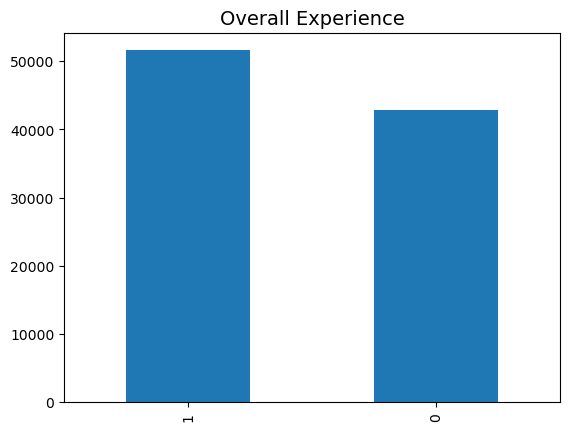

In [57]:
df_train['Overall_Experience'].value_counts().plot(kind = 'bar')
plt.title('Overall Experience', fontsize = 14)
plt.show()

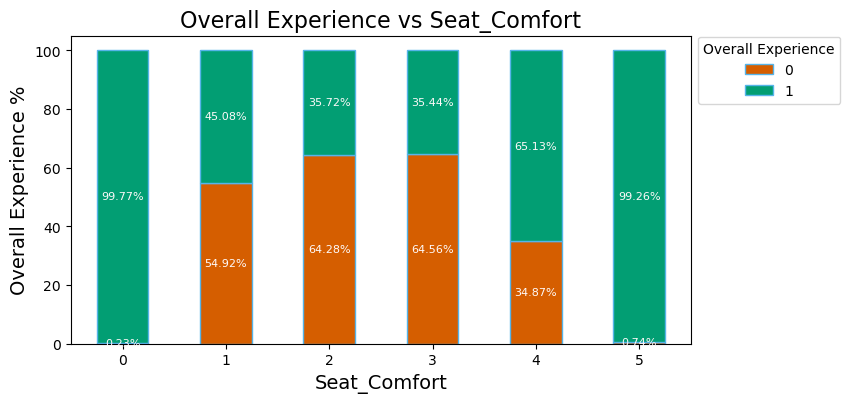

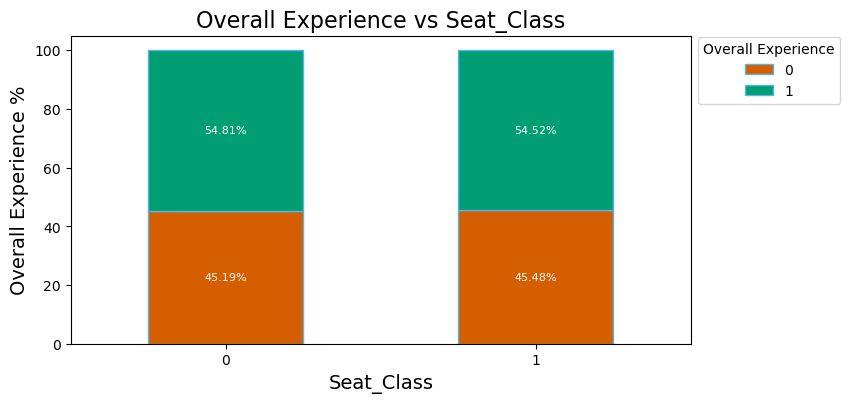

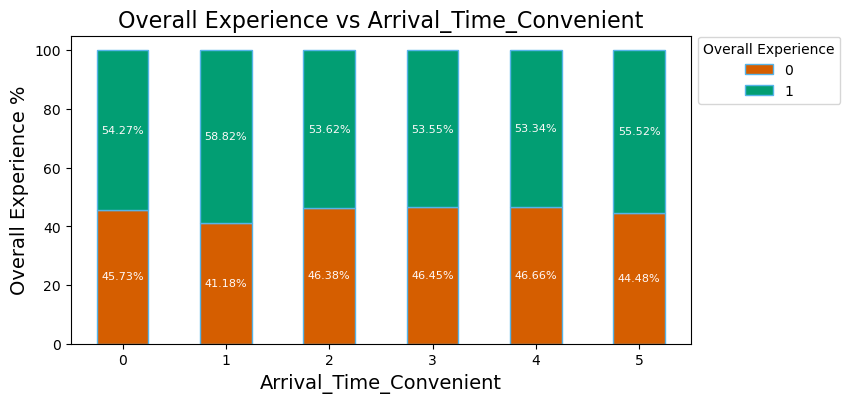

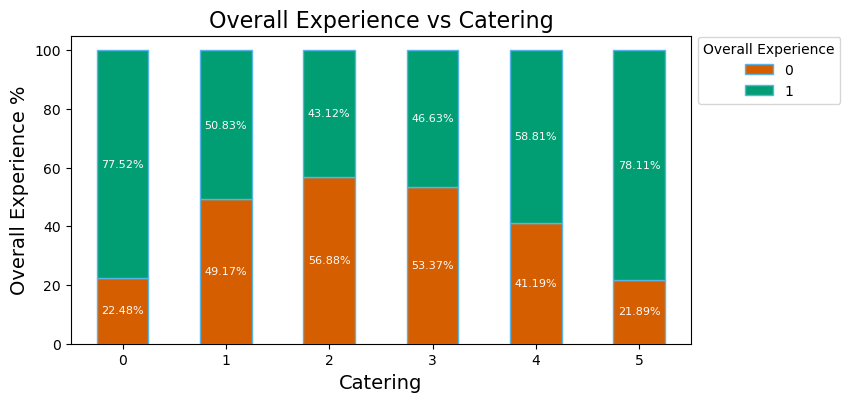

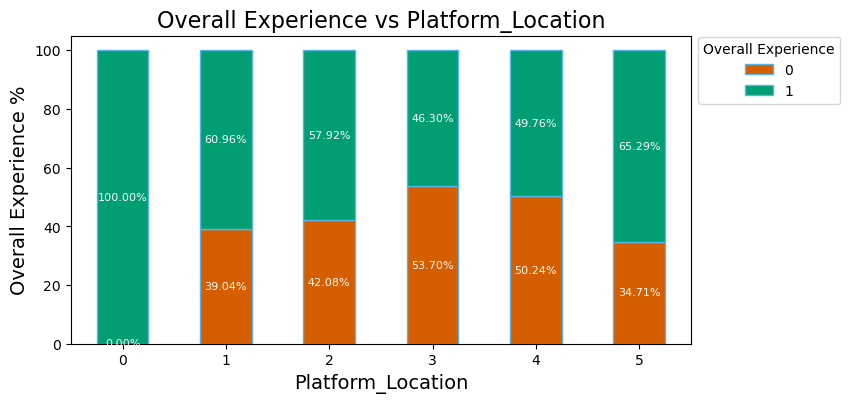

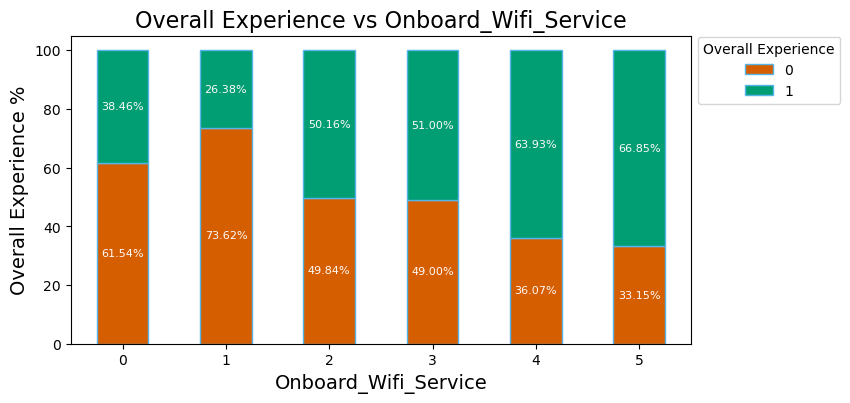

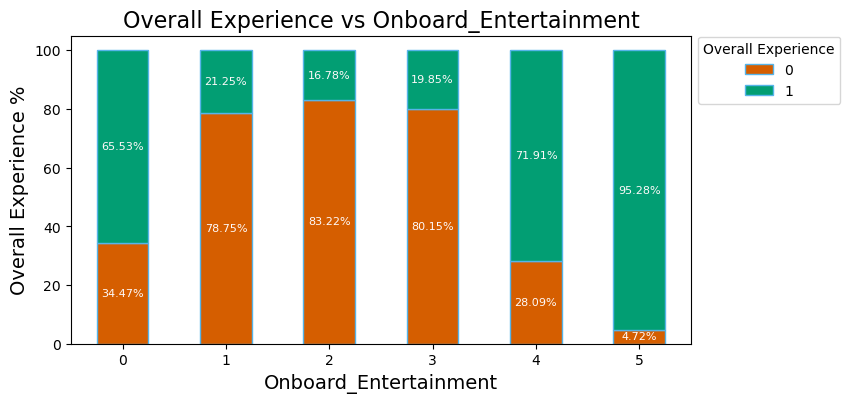

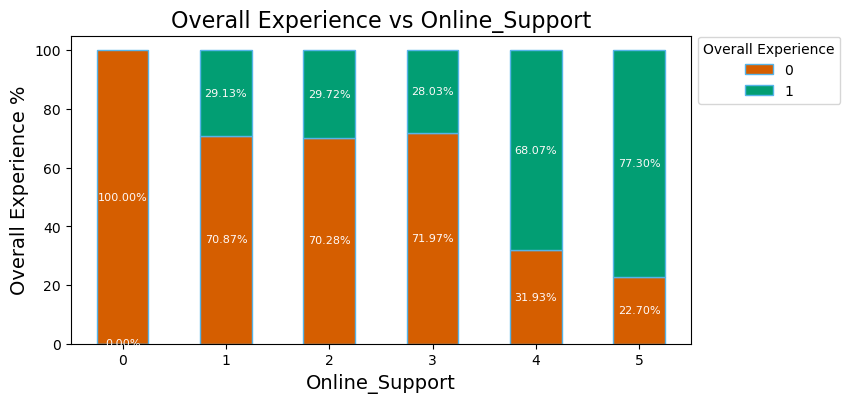

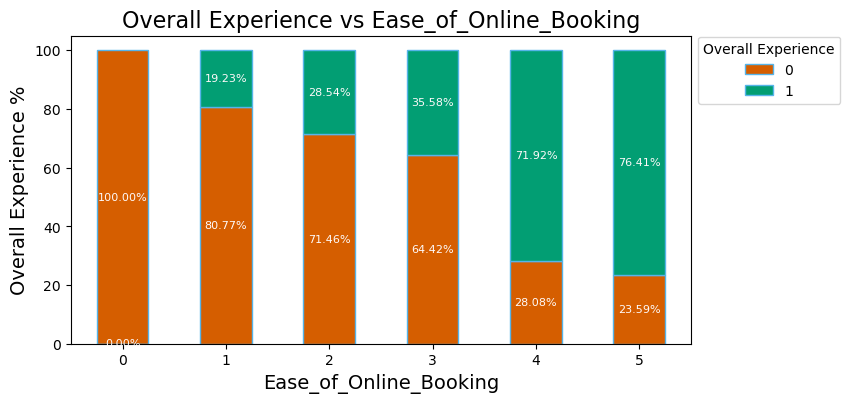

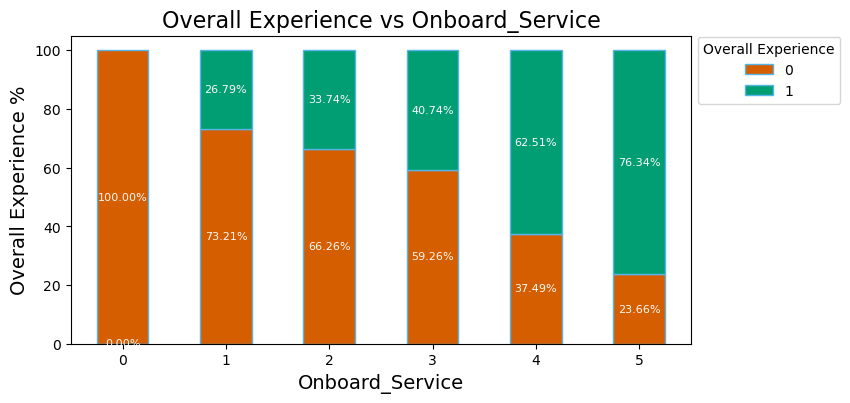

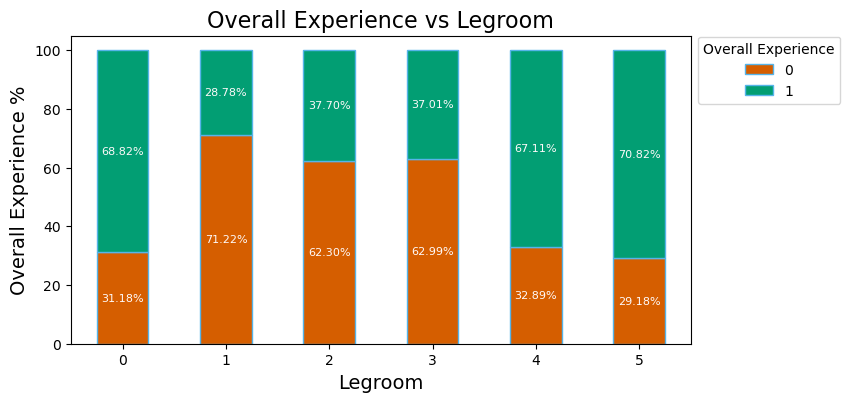

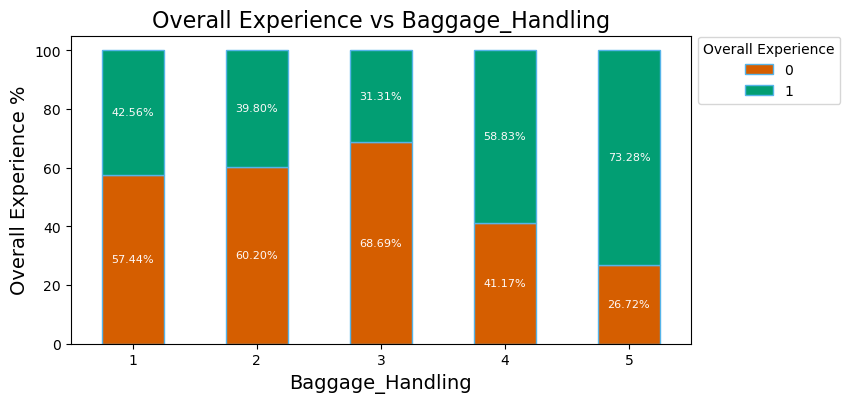

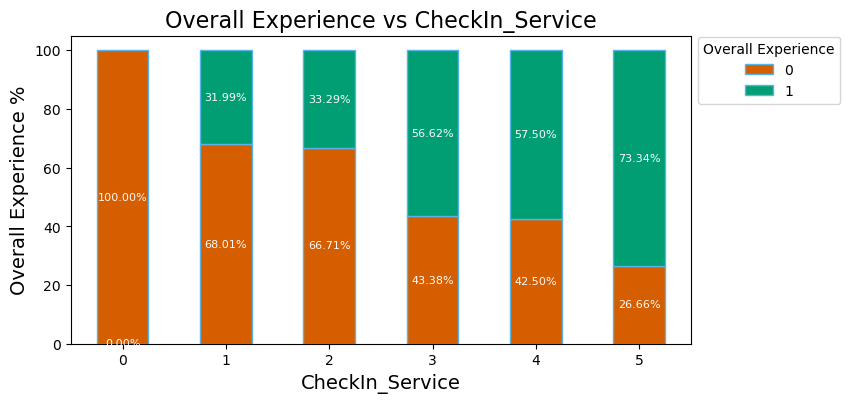

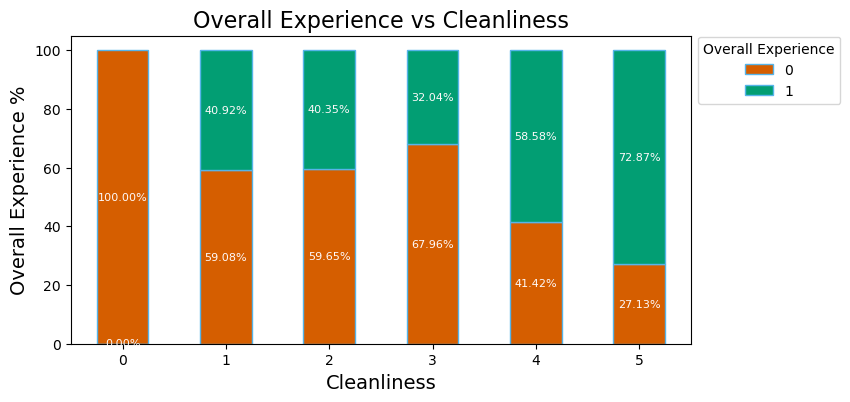

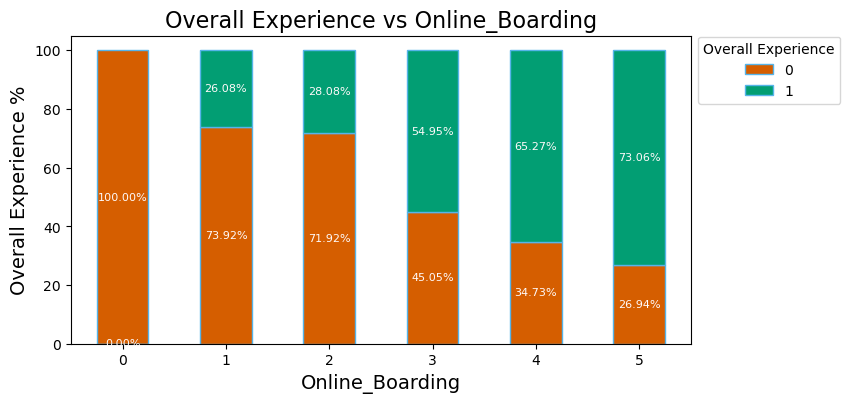

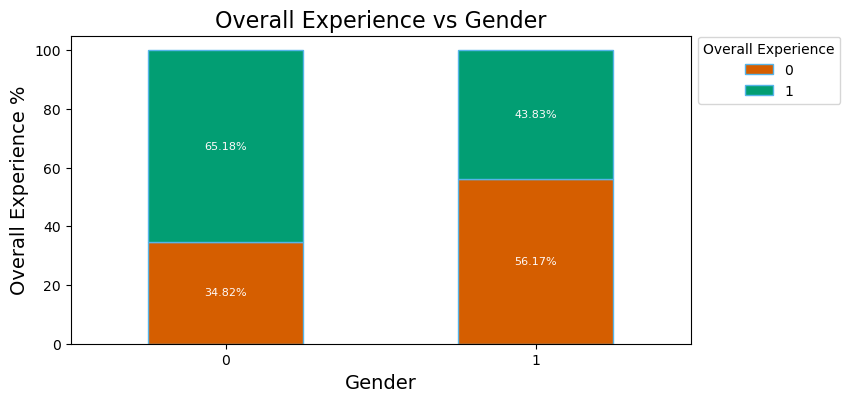

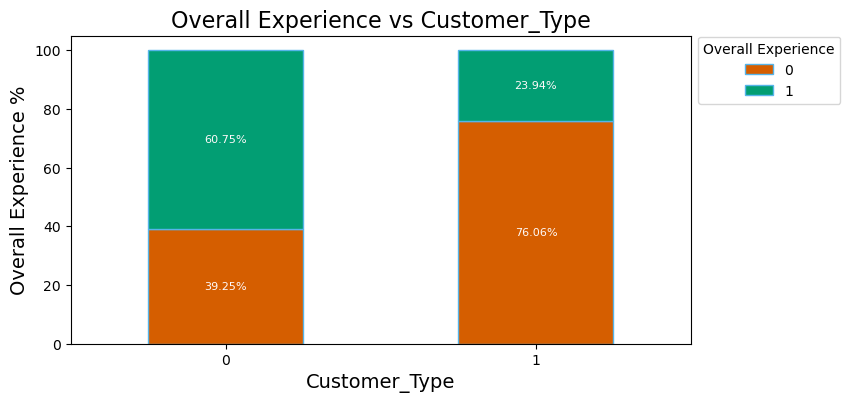

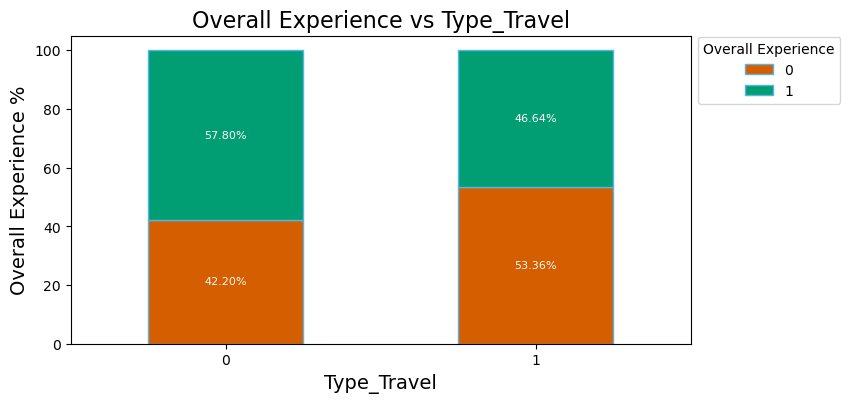

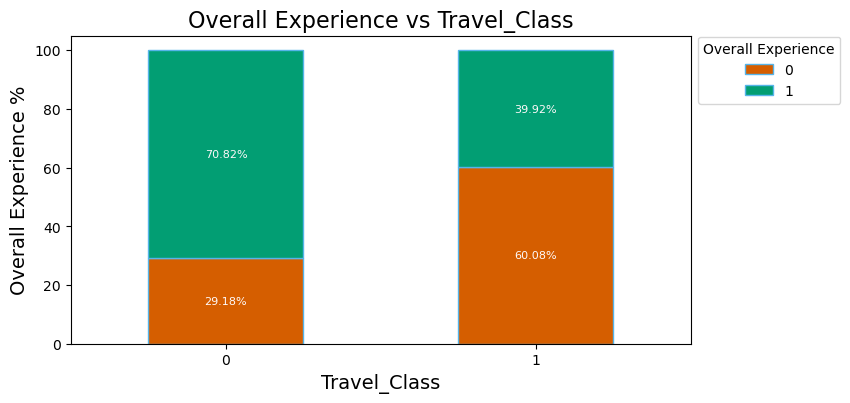

In [58]:
color = ['#d55e00', '#029e73']
cat_cols = ['Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']
for i in cat_cols:
  crosstab = (pd.crosstab(df_train[i],df_train['Overall_Experience'],normalize='index')*100)
  a = crosstab.plot(kind='bar',figsize=(8,4),stacked=True, color = color, edgecolor = '#56b4e9')
  plt.ylabel('Overall Experience %', fontsize = 14)
  plt.xlabel('{}'.format(i), fontsize = 14)
  a.legend(title='Overall Experience', bbox_to_anchor=(1, 1.02),
  loc='upper left')
  a.bar_label(a.containers[0], label_type='center', fmt = '{:.2f}%', color = 'snow', fontsize = 8)
  a.bar_label(a.containers[1], label_type='center', fmt = '{:.2f}%', color = 'snow', fontsize = 8)
  plt.title('Overall Experience vs {}'.format(i), fontsize = 16)
  plt.xticks(rotation=0, fontsize=10)

In [59]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of {} for {}=".format(predictor, target) + str(target_uniq[0]), fontsize = 10)
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of {} for {}=".format(predictor, target) + str(target_uniq[1]), fontsize = 10)
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot of {} w.r.t {}".format(predictor, target), fontsize = 10)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="colorblind")

    axs[1, 1].set_title("Boxplot (without outliers) of {} w.r.t {}".format(predictor, target), fontsize = 10)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

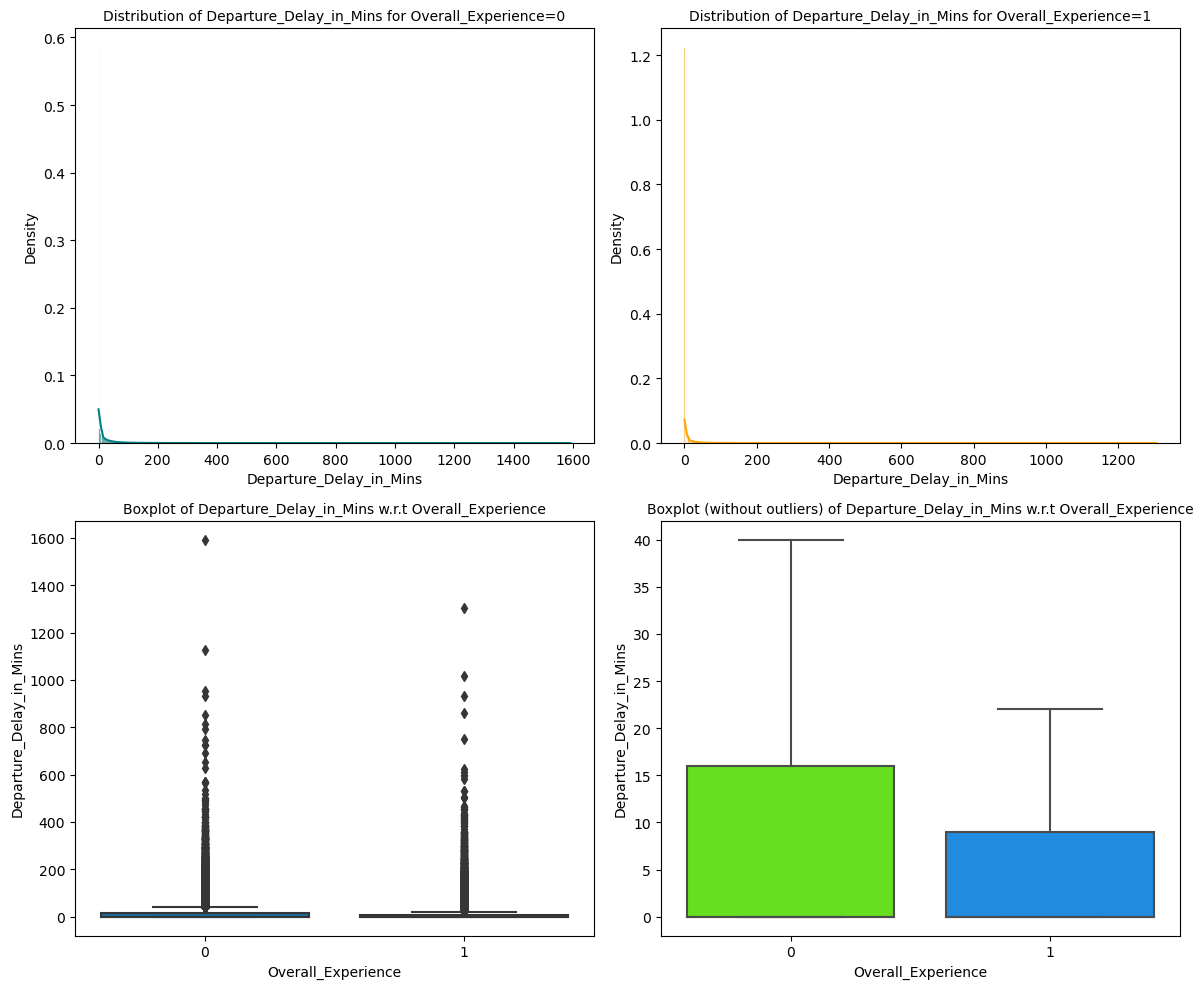

In [60]:
distribution_plot_wrt_target(df_train, 'Departure_Delay_in_Mins', 'Overall_Experience')

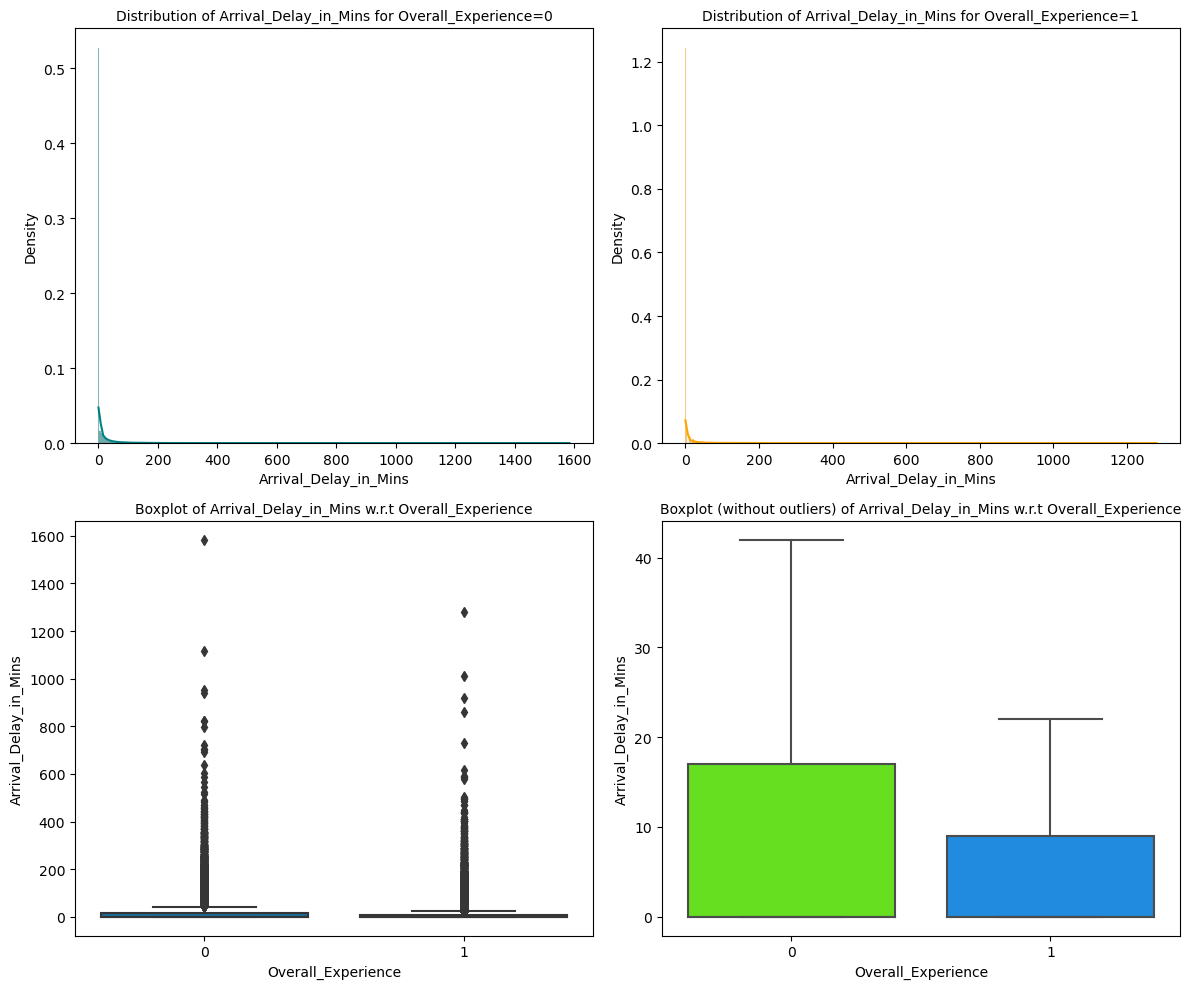

In [61]:
distribution_plot_wrt_target(df_train, 'Arrival_Delay_in_Mins', 'Overall_Experience')

#### After visualizing the Arrival Delay and Departure Delay w.r.t. Overall Experience, these variables seems to have no effect on the Overall Experience rating and can be dropped from the dataset.

# Preparing Data for Modelling

In [62]:
#seperating the independant and dependant variables
Data_x_train = df_train.drop(['ID', 'Overall_Experience', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'], axis = 1)
Data_y_train = df_train['Overall_Experience']
display(Data_x_train.head())

X_pred = df_test.drop(['ID', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'], axis = 1)
display(X_pred.head())

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Gender,Customer_Type,Type_Travel,Travel_Class,Travel_Distance,Age_25,Age_35,Age_45,Age_60,Age_80
0,2,0,5,5,5,4,2,3,2,2,...,0,0,0,0,272,0,0,1,0,0
1,1,1,5,1,2,4,1,4,4,5,...,1,0,1,1,2200,0,0,1,0,0
2,2,0,2,2,2,2,4,5,5,5,...,0,0,0,0,1061,0,0,1,0,0
3,3,1,2,3,2,3,2,3,3,3,...,0,0,0,0,780,0,0,1,0,0
4,3,1,3,3,3,2,4,5,4,4,...,0,0,0,0,1981,0,0,1,0,0


,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Gender,Customer_Type,Type_Travel,Travel_Class,Travel_Distance,Age_25,Age_35,Age_45,Age_60,Age_80
0,3,0,3,3,3,2,5,4,5,5,...,0,0,0,0,532,0,1,0,0,0
1,0,1,4,1,3,3,1,3,3,5,...,0,1,0,0,1425,1,0,0,0,0
2,5,1,5,5,5,5,5,5,2,2,...,1,0,0,0,2832,0,0,0,1,0
3,3,0,5,3,5,1,3,5,1,3,...,0,0,1,1,1352,0,1,0,0,0
4,5,1,0,5,2,5,5,5,5,4,...,1,1,0,0,1610,1,0,0,0,0


In [63]:
df_scaled_x_train = Data_x_train.apply(zscore)
df_scaled_pred = X_pred.apply(zscore)

In [64]:
df_scaled_x_train.head()

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Gender,Customer_Type,Type_Travel,Travel_Class,Travel_Distance,Age_25,Age_35,Age_45,Age_60,Age_80
0,-0.602903,-0.994811,1.288950,1.549973,1.536013,0.569615,-1.027150,-0.397449,-1.126732,-1.235539,...,-0.985222,-0.445082,-0.625411,-1.046703,-1.660469,-0.412272,-0.684821,1.406851,-0.478294,-0.11758
1,-1.321256,1.005216,1.288950,-1.356788,-0.757533,0.569615,-1.770047,0.367298,0.405697,1.213628,...,1.014999,-0.445082,1.598950,0.955380,0.215099,-0.412272,-0.684821,1.406851,-0.478294,-0.11758
2,-0.602903,-0.994811,-0.735667,-0.630097,-0.757533,-0.946258,0.458644,1.132046,1.171912,1.213628,...,-0.985222,-0.445082,-0.625411,-1.046703,-0.892926,-0.412272,-0.684821,1.406851,-0.478294,-0.11758
3,0.115449,1.005216,-0.735667,0.096593,-0.757533,-0.188322,-1.027150,-0.397449,-0.360518,-0.419150,...,-0.985222,-0.445082,-0.625411,-1.046703,-1.166284,-0.412272,-0.684821,1.406851,-0.478294,-0.11758
4,0.115449,1.005216,-0.060795,0.096593,0.006983,-0.946258,0.458644,1.132046,0.405697,0.397239,...,-0.985222,-0.445082,-0.625411,-1.046703,0.002054,-0.412272,-0.684821,1.406851,-0.478294,-0.11758


In [65]:
df_scaled_pred.head()

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Gender,Customer_Type,Type_Travel,Travel_Class,Travel_Distance,Age_25,Age_35,Age_45,Age_60,Age_80
0,0.117190,-1.003320,-0.055289,0.098743,0.008010,-0.950595,1.200083,0.367859,1.166951,1.218455,...,-0.983397,-0.444331,-0.618071,-1.038491,-1.420638,-0.413432,1.459494,-0.706556,-0.482891,-0.112378
1,-2.036384,0.996691,0.620210,-1.357833,0.008010,-0.191237,-1.773978,-0.400356,-0.365284,1.218455,...,-0.983397,2.250573,-0.618071,-1.038491,-0.548819,2.418779,-0.685169,-0.706556,-0.482891,-0.112378
2,1.552905,0.996691,1.295708,1.555318,1.545325,1.327480,1.200083,1.136075,-1.131402,-1.216905,...,1.016883,-0.444331,-0.618071,-1.038491,0.824810,-0.413432,-0.685169,-0.706556,2.070863,-0.112378
3,0.117190,-1.003320,1.295708,0.098743,1.545325,-1.709954,-0.286947,1.136075,-1.897520,-0.405118,...,-0.983397,-0.444331,1.617938,0.962936,-0.620087,-0.413432,1.459494,-0.706556,-0.482891,-0.112378
4,1.552905,0.996691,-2.081785,1.555318,-0.760648,1.327480,1.200083,1.136075,1.166951,0.406669,...,1.016883,2.250573,-0.618071,-1.038491,-0.368206,2.418779,-0.685169,-0.706556,-0.482891,-0.112378


In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled_x_train, Data_y_train, test_size = 0.2, random_state = 42)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75503, 25)
(18876, 25)
(75503,)
(18876,)


# Model Building

In [68]:
# Function to print the classification report and get confusion matrix in a proper format

# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

scores =[]
for k in range(1, 300):
    rfc = RandomForestClassifier(n_estimators=k, random_state = 100, criterion = "entropy")
    rfc.fit(X_train, y_train)
    y_pred_k = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_k))


# plot the relationship between K and testing accuracy

plt.plot(range(1, 300), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')


In [69]:
rf_model = RandomForestClassifier(n_estimators=230, random_state = 100, criterion = "entropy")

In [70]:
rf_model.fit(X_train , y_train)
y_predict = rf_model.predict(X_train)
print('Random Forest Model')
print('Accuracy Score on Training Data:')
display(accuracy_score(y_train, y_predict))
print('F1 Score on Training Data:')
display(f1_score(y_train, y_predict))
print('ROC AUC Score on Training Data:')
display(roc_auc_score(y_train, y_predict))

Random Forest Model
Accuracy Score on Training Data:


1.0

F1 Score on Training Data:


1.0

ROC AUC Score on Training Data:


1.0

In [71]:
y_predict_test = rf_model.predict(X_test)
print('Random Forest Model')
print('Accuracy Score on Test Data:')
display(accuracy_score(y_test, y_predict_test))
print('F1 Score on Test Data:')
display(f1_score(y_test, y_predict_test))
print('ROC AUC Score on Test Data:')
display(roc_auc_score(y_test, y_predict_test))

Random Forest Model
Accuracy Score on Test Data:


0.9532210214028396

F1 Score on Test Data:


0.9575133522590579

ROC AUC Score on Test Data:


0.9535869641605542

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34381
           1       1.00      1.00      1.00     41122

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



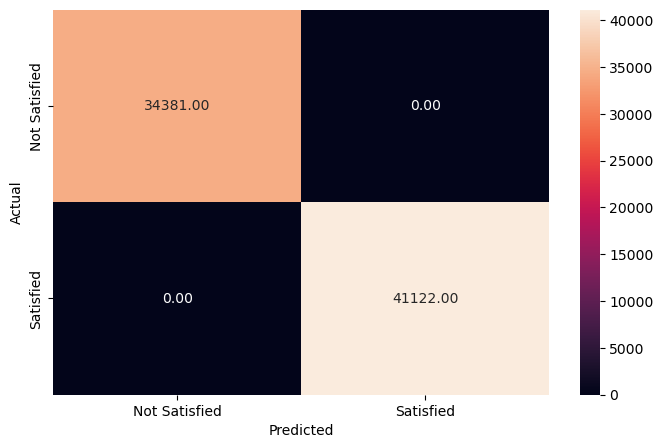

In [72]:
metrics_score(y_train, y_predict)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8405
           1       0.96      0.95      0.96     10471

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



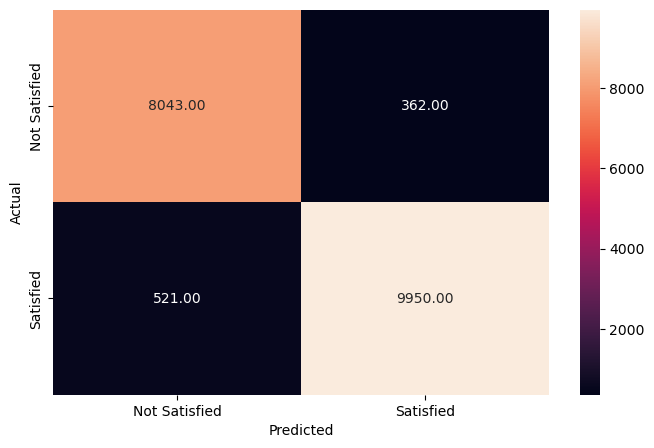

In [73]:
metrics_score(y_test, y_predict_test)

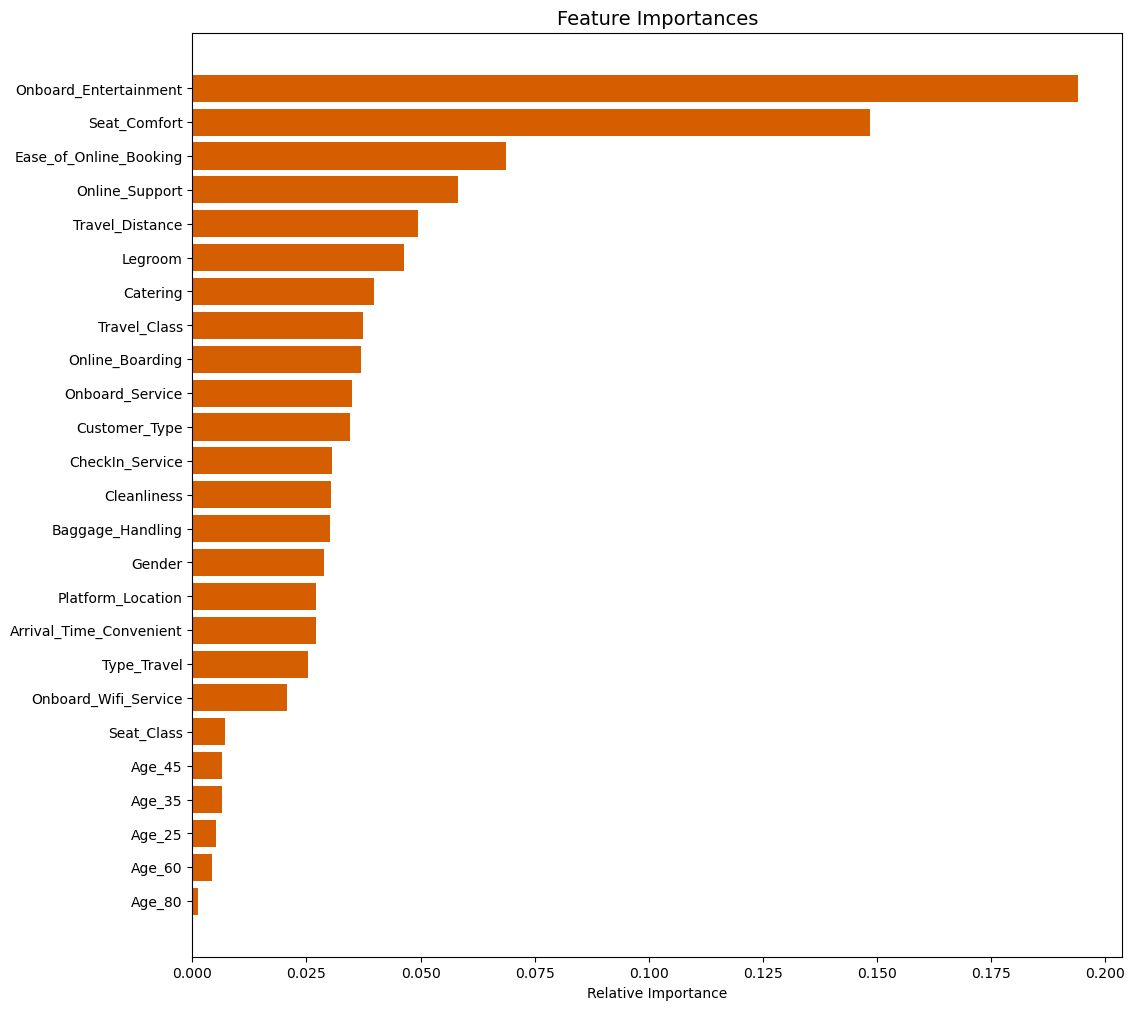

In [74]:
importances = rf_model.feature_importances_

indices = np.argsort(importances)

feature_names = list(X_train.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances', fontsize = 14)

plt.barh(range(len(indices)), importances[indices], color = '#d55e00', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance', fontsize = 10)

plt.show()

In [75]:
ada = AdaBoostClassifier(base_estimator=rf_model, n_estimators=22, learning_rate=0.1, random_state= 88)

In [76]:
ada.fit(X_train , y_train)

/Users/aseemmehrotra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         n_estimators=230,
                                                         random_state=100),
                   learning_rate=0.1, n_estimators=22, random_state=88)

In [77]:
y_predict_ada_train = ada.predict(X_train)
print('Adaboost Classifier Model with RF as Base Estimator')
print('Accuracy Score on Training Data:')
display(accuracy_score(y_train, y_predict_ada_train))
print('F1 Score on Training Data:')
display(f1_score(y_train, y_predict_ada_train))
print('ROC AUC Score on Training Data:')
display(roc_auc_score(y_train, y_predict_ada_train))

Adaboost Classifier Model with RF as Base Estimator
Accuracy Score on Training Data:


1.0

F1 Score on Training Data:


1.0

ROC AUC Score on Training Data:


1.0

In [78]:
y_predict_ada_test = ada.predict(X_test)
print('Adaboost Classifier Model with RF as Base Estimator')
print('Accuracy Score on Test Data:')
display(accuracy_score(y_test, y_predict_ada_test))
print('F1 Score on Test Data:')
display(f1_score(y_test, y_predict_ada_test))
print('ROC AUC Score on Test Data:')
display(roc_auc_score(y_test, y_predict_ada_test))

Adaboost Classifier Model with RF as Base Estimator
Accuracy Score on Test Data:


0.9522144522144522

F1 Score on Test Data:


0.9566179299730665

ROC AUC Score on Test Data:


0.9525153719081698

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34381
           1       1.00      1.00      1.00     41122

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



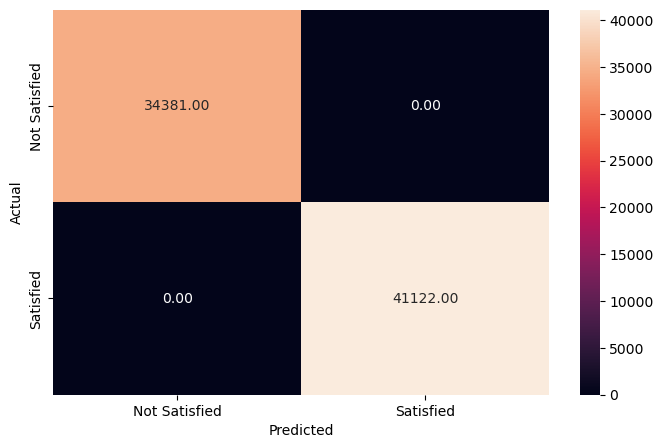

In [79]:
metrics_score(y_train, y_predict_ada_train)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8405
           1       0.96      0.95      0.96     10471

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



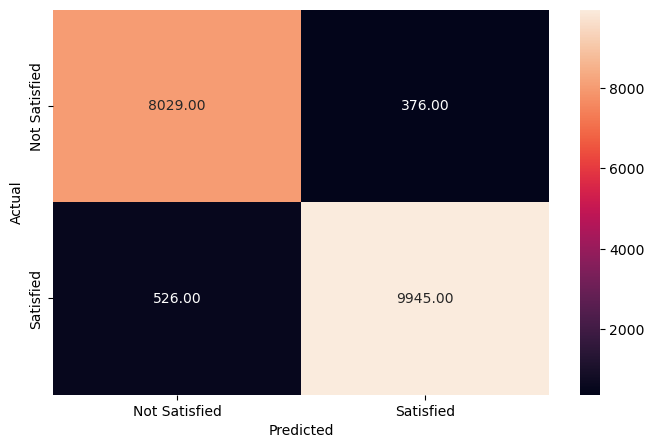

In [80]:
metrics_score(y_test, y_predict_ada_test)

# Predicting on Unseen Data

In [81]:
X_pred_cp = df_scaled_pred.copy()

In [82]:
pred = rf_model.predict(df_scaled_pred)

In [83]:
df_test_final = df_test.copy()

In [84]:
df_test_final['Overall_Experience'] = pred

In [85]:
df_test_final.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Age_25,Age_35,Age_45,Age_60,Age_80,Overall_Experience
0,99900001,3,0,3,3,3,2,5,4,5,...,0,532,0.0,0.0,0,1,0,0,0,1
1,99900002,0,1,4,1,3,3,1,3,3,...,0,1425,9.0,28.0,1,0,0,0,0,1
2,99900003,5,1,5,5,5,5,5,5,2,...,0,2832,0.0,0.0,0,0,0,1,0,1
3,99900004,3,0,5,3,5,1,3,5,1,...,1,1352,0.0,0.0,0,1,0,0,0,0
4,99900005,5,1,0,5,2,5,5,5,5,...,0,1610,17.0,0.0,1,0,0,0,0,1


In [86]:
submission = df_test_final[['ID', 'Overall_Experience']]

In [87]:
submission.shape

(35602, 2)

In [88]:
submission.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [89]:
project = submission.set_index('ID')

In [90]:
project.to_csv('project_shinkansen_final_submission.csv')